Exercise 1

In [120]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [121]:
X, y = make_moons(n_samples=1000, random_state=42)

In [122]:
X.shape

(1000, 2)

In [123]:
y.shape

(1000,)

In [124]:
y = y.reshape(-1, 1)

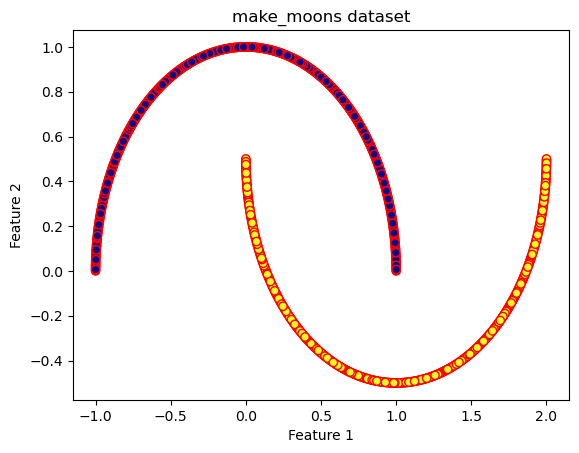

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons dataset')
plt.show()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
device = torch.device('mps' if torch.mps.is_available else 'cpu')
device

device(type='mps')

In [128]:
X_train = torch.tensor(X_train, dtype=torch.float).to(device)
X_test  = torch.tensor(X_test, dtype=torch.float).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
y_test  = torch.tensor(y_test, dtype=torch.float).to(device)

In [129]:
class NeuralNetwork(nn.Module):
    def __init__(self, input):
        super().__init__()
        self.layer1 = nn.Linear(in_features=input, out_features=64)
        self.layer2 = nn.Linear(in_features=64, out_features=32)
        self.layer3 = nn.Linear(in_features=32, out_features=1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)

        x = self.relu(self.layer2(x))
        x = self.dropout(x)

        x = self.sigmoid(self.layer3(x))
        return x

In [130]:
input = X.shape[1]
input

2

In [131]:
model = NeuralNetwork(input).to(device)
model

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [132]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [133]:
torch.manual_seed(42)

epoch_size, train_loss_l, test_loss_l, train_acc_l, test_acc_l = [], [], [], [], []

epochs = 1000

for epoch in range(epochs):
    model.train()
    train_pred = model(X_train)
    train_loss = criterion(train_pred, y_train).squeeze()
    train_acc = accuracy_score(y_train.cpu(), (train_pred > 0.5).int().cpu())
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test).squeeze()
        test_acc  = accuracy_score(y_test.cpu(), (test_pred > 0.5).int().cpu())

    if epoch % 20 == 0:
        train_loss_l.append(train_loss.item())
        test_loss_l.append(test_loss.item())
        train_acc_l.append(train_acc)
        test_acc_l.append(test_acc)
        print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch 000 | Train Loss: 0.6946 | Train Acc: 0.5088 | Test Loss: 0.6329 | Test Acc: 0.8150
Epoch 020 | Train Loss: 0.1896 | Train Acc: 0.9125 | Test Loss: 0.1417 | Test Acc: 0.9400
Epoch 040 | Train Loss: 0.0626 | Train Acc: 0.9800 | Test Loss: 0.0270 | Test Acc: 1.0000
Epoch 060 | Train Loss: 0.0154 | Train Acc: 0.9975 | Test Loss: 0.0042 | Test Acc: 1.0000
Epoch 080 | Train Loss: 0.0051 | Train Acc: 0.9988 | Test Loss: 0.0012 | Test Acc: 1.0000
Epoch 100 | Train Loss: 0.0072 | Train Acc: 1.0000 | Test Loss: 0.0010 | Test Acc: 1.0000
Epoch 120 | Train Loss: 0.0031 | Train Acc: 1.0000 | Test Loss: 0.0007 | Test Acc: 1.0000
Epoch 140 | Train Loss: 0.0034 | Train Acc: 1.0000 | Test Loss: 0.0006 | Test Acc: 1.0000
Epoch 160 | Train Loss: 0.0018 | Train Acc: 1.0000 | Test Loss: 0.0003 | Test Acc: 1.0000
Epoch 180 | Train Loss: 0.0022 | Train Acc: 1.0000 | Test Loss: 0.0001 | Test Acc: 1.0000
Epoch 200 | Train Loss: 0.0022 | Train Acc: 1.0000 | Test Loss: 0.0002 | Test Acc: 1.0000
Epoch 220 

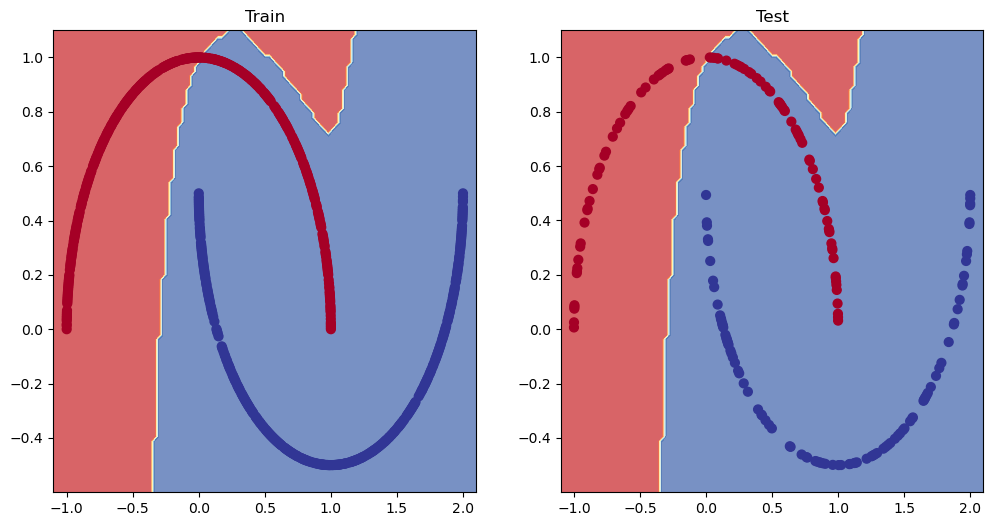

In [134]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

Exercise 2

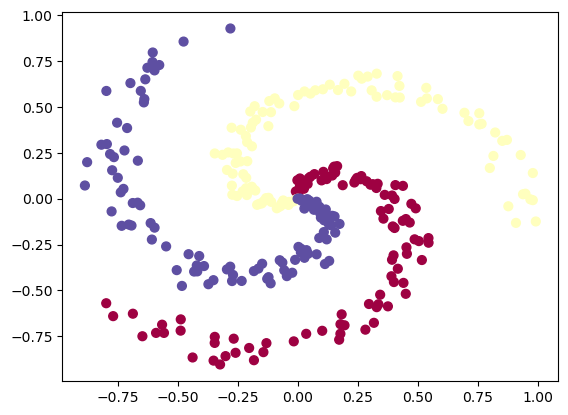

In [135]:
N = 100
D = 2
K = 3
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test  = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test  = torch.tensor(y_test, dtype=torch.long).to(device)

In [149]:
class MulticlassModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model0 = MulticlassModel(2, 4, 8).to(device)
model0

MulticlassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [150]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [151]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epochs = 500

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_logits_train = model(X_train)
    train_loss = criterion(y_logits_train, y_train)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_preds_train = y_logits_train.argmax(dim=1)
        y_preds_test  = model(X_test).argmax(dim=1)
        
        train_acc = accuracy_score(y_train.cpu(), y_preds_train.cpu())
        test_acc  = accuracy_score(y_test.cpu(), y_preds_test.cpu())
    
    if epoch % 20 == 0:
        print(f'Epoch: {epoch:03d} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f} | Test Loss: {criterion(model(X_test), y_test):.5f}, Test Acc: {test_acc:.2f}')


Epoch: 000 | Train Loss: 0.04599, Train Acc: 0.99 | Test Loss: 0.15239, Test Acc: 0.98
Epoch: 020 | Train Loss: 0.04351, Train Acc: 0.99 | Test Loss: 0.15898, Test Acc: 0.98
Epoch: 040 | Train Loss: 0.04009, Train Acc: 0.99 | Test Loss: 0.16647, Test Acc: 0.98
Epoch: 060 | Train Loss: 0.03717, Train Acc: 0.99 | Test Loss: 0.17755, Test Acc: 0.98
Epoch: 080 | Train Loss: 0.03445, Train Acc: 0.99 | Test Loss: 0.18871, Test Acc: 0.98
Epoch: 100 | Train Loss: 0.03174, Train Acc: 0.99 | Test Loss: 0.19501, Test Acc: 0.98
Epoch: 120 | Train Loss: 0.02949, Train Acc: 0.99 | Test Loss: 0.20613, Test Acc: 0.98
Epoch: 140 | Train Loss: 0.02767, Train Acc: 0.99 | Test Loss: 0.21965, Test Acc: 0.98
Epoch: 160 | Train Loss: 0.02615, Train Acc: 0.99 | Test Loss: 0.22811, Test Acc: 0.98
Epoch: 180 | Train Loss: 0.02486, Train Acc: 0.99 | Test Loss: 0.23621, Test Acc: 0.98
Epoch: 200 | Train Loss: 0.02376, Train Acc: 0.99 | Test Loss: 0.24288, Test Acc: 0.98
Epoch: 220 | Train Loss: 0.02284, Train Acc

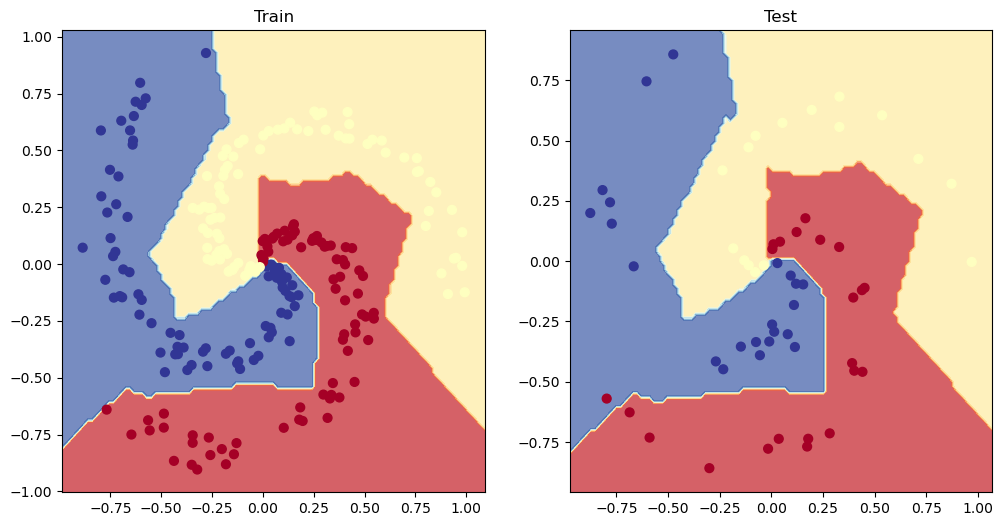

In [153]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)